In [9]:
import xarray as xr
import matplotlib.pyplot as plt

In [10]:
from sithom.plot import plot_defaults

In [11]:
plot_defaults()

In [3]:
import os

In [4]:
ds = xr.open_dataset("fort.22.nc")
ds

/work/n01/n01/sithom/miniconda3/lib/python3.10/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    group_order:   Main 2004217N13306 2004223N11301 2004227N09314
    institution:  Oceanweather Inc.
    conventions:  CF-1.6 OWI-NWS12b-0.1

In [2]:
from netCDF4 import Dataset

In [3]:
ds2 = Dataset("fort.22.nc")
ds2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order:  Main 2004217N13306 2004223N11301 2004227N09314
    institution: Oceanweather Inc.
    conventions: CF-1.6 OWI-NWS12b-0.1
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, 2004217N13306, 2004223N11301, 2004227N09314

In [5]:
ds2.groups["Main"]

<class 'netCDF4._netCDF4.Group'>
group /Main:
    rank: 1
    dimensions(sizes): time(673), yi(385), xi(393)
    variables(dimensions): float64 lat(yi, xi), float64 lon(yi, xi), int32 time(time), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [8]:
ds2.groups["Main"].variables["PSFC"][:].shape

(673, 385, 393)

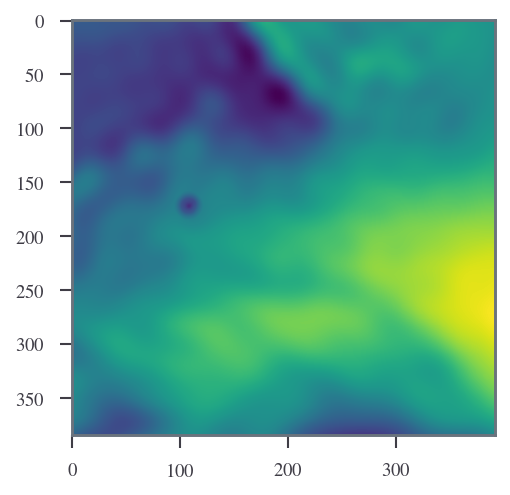

In [12]:
plt.imshow(ds2.groups["Main"].variables["PSFC"][0, :])

In [13]:
ds2.groups["Main"].variables["PSFC"][:].mean()

1016.49475

In [14]:
ds2.groups["Main"].variables["U10"][:].mean()

-1.3786967

In [15]:
ds2.groups["Main"].variables["V10"][:].mean()

0.6840281

In [16]:
ds2.groups["2004217N13306"]

<class 'netCDF4._netCDF4.Group'>
group /2004217N13306:
    rank: 2
    dimensions(sizes): time(481), yi(161), xi(161)
    variables(dimensions): float64 lat(time, yi, xi), float64 clat(time), float64 lon(time, yi, xi), float64 clon(time), int32 time(time), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

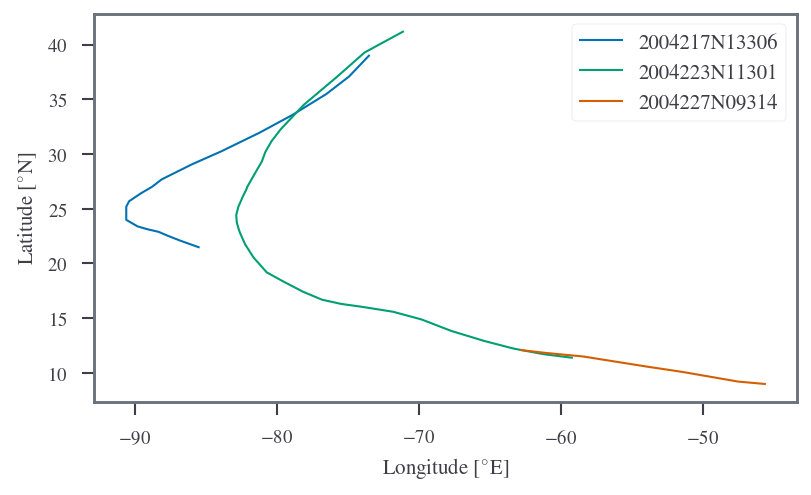

In [22]:
for group in ds2.groups:
    if group != "Main":
        plt.plot(ds2.groups[group].variables["clon"][:], 
                 ds2.groups[group].variables["clat"][:], label=group)
        plt.legend()
plt.xlabel(r"Longitude [$^{\circ}$E]")
plt.ylabel(r"Latitude [$^{\circ}$N]")


In [16]:
xr.open_dataset("fort.22.nc")

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    group_order:   Main 2004217N13306 2004223N11301 2004227N09314
    institution:  Oceanweather Inc.
    conventions:  CF-1.6 OWI-NWS12b-0.1

In [18]:
ds63 = Dataset("fort.63.nc")
ds63


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 022ef7c
    grid_type: Triangular
    description: SWAN+ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    agrid: eastcoast_95d_ll_select.grd
    rundes: SWAN+ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    runid: Gustav (2008) on EC95d  ! 24 CHARACTER ALPANUMERIC RUN IDENTIFICATION
    title: NCFS
    institution: UNC-CH IMS, RENCI, SeahorseCoastal
    source: RENCI HPC
    history: NCFS Nowcast/Forecast
    references: http://www.renci.org
    comments: Model time is relative to UTC.
    host: RENCI HPC
    convention: CF
    Conventions: UGRID-0.9.0
    contact: jason.fleming@seahorsecoastal.com
    creation_date: 2024-01-23 14:13:51  00:00
    modification_date: 2024-01-23 14:13:51  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 1.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa:

In [21]:
ds63.variables["zeta"][:].shape

(1008, 31435)